# Machine Learning Pipeline - Model Training - Decission Tree

En este notebook, recogemos los conjuntos de datos transformados y las variables seleccionadas que guardamos en los notebooks anteriores

# Reproducibilidad: sembramos la semilla

Con el objetivo de garantizar la reproducibilidad entre ejecuciones del mismo notebook, pero también entre el entorno de investigación y producción, para cada paso que incluya algún elemento de aleatoriedad, es extremadamente importante que **establezcamos la semilla**

In [1]:
# Para manipulacion de datos
import pandas as pd
import numpy as np

# Para graficar
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Para guardar el modelo
import joblib

# Para construir los modelos
#Clasificación
from sklearn.tree import DecisionTreeClassifier

# Para evaluar los modelos
from sklearn.metrics import roc_auc_score, classification_report

# Para visualizar todas las columnas del dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
# cargar el conjunto de entrenamiento y el de prueba con las variables diseñadas 
# construimos y guardamos estos conjuntos de datos en el notebook anterior. 

X_train = pd.read_csv('../data/xtrain.csv')
X_test = pd.read_csv('../data/xtest.csv')

X_train.head()

,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,PhoneService_0,PhoneService_1,MultipleLines_0,MultipleLines_1,MultipleLines_2,InternetService_0,InternetService_1,InternetService_2,OnlineSecurity_0,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_0,OnlineBackup_1,OnlineBackup_2,DeviceProtection_0,DeviceProtection_1,DeviceProtection_2,TechSupport_0,TechSupport_1,TechSupport_2,StreamingTV_0,StreamingTV_1,StreamingTV_2,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,tenure_disc_corr_0,tenure_disc_corr_1,tenure_disc_corr_2,tenure_disc_corr_3,TotalCharges_disc_corr_0,TotalCharges_disc_corr_1,TotalCharges_disc_corr_2,TotalCharges_disc_corr_3
0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0
2,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
3,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0
4,1,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1


In [3]:
# Cargamos la target

y_train = pd.read_csv('../data/ytrain.csv')
y_test = pd.read_csv('../data/ytest.csv')

y_train.head()

,Churn
0,0
1,0
2,0
3,1
4,0


### Instanciamos el modelo de Arbol de decision: 

Recordamos sembrar la semilla.

In [4]:
# configurar el modelo 
# recuerdar establecer random_state / seed

# Instancia

#Instanciar
ac = DecisionTreeClassifier(max_depth=10)

#Entrenar
ac.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [5]:
# evalua el modelomos: 

pred = ac.predict_proba(X_train)[:,1]


print('train auc: {}'.format(
    roc_auc_score(y_train, pred)))
print()

# make predictions for test set
pred = ac.predict_proba(X_test)[:,1]

# determine auc

print('test auc: {}'.format(
    roc_auc_score(y_test, pred)))
print()

ac_auc={'Auc':np.round(roc_auc_score(y_test, pred),2)}

train auc: 0.928019144106836

test auc: 0.7662920767780104



In [6]:
alphas = ac.cost_complexity_pruning_path(X_train, y_train)['ccp_alphas']
alphas

array([0.00000000e+00, 7.29952807e-06, 7.87243655e-06, 1.35880412e-05,
       1.38602375e-05, 1.57772256e-05, 2.39209956e-05, 2.82376480e-05,
       2.85709373e-05, 3.38083405e-05, 3.69778724e-05, 4.22604256e-05,
       4.35362121e-05, 4.56412597e-05, 5.17690214e-05, 5.37859963e-05,
       5.54668087e-05, 5.64752961e-05, 5.70515746e-05, 5.78199460e-05,
       5.91178255e-05, 6.08550129e-05, 6.08678760e-05, 6.14401573e-05,
       6.17406519e-05, 6.31089023e-05, 6.31089023e-05, 6.76166810e-05,
       6.76166810e-05, 6.90699807e-05, 7.09975151e-05, 7.37281887e-05,
       7.39557449e-05, 7.57306828e-05, 7.88861279e-05, 8.06789944e-05,
       8.11400172e-05, 8.19202097e-05, 8.32478716e-05, 8.41957711e-05,
       8.43095492e-05, 8.50038276e-05, 8.58840908e-05, 8.60575940e-05,
       8.68176136e-05, 8.74188311e-05, 8.75447614e-05, 8.87468939e-05,
       9.17489735e-05, 9.29729364e-05, 9.29729364e-05, 9.36230968e-05,
       9.38472901e-05, 9.66355066e-05, 9.73910718e-05, 9.86076598e-05,
      

In [7]:
arboles = []

for alpha in alphas:
    arbol = DecisionTreeClassifier(ccp_alpha=alpha)
    arbol.fit(X_train, y_train)
    arboles.append(arbol)

arboles

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=7.299528066302165e-06),
 DecisionTreeClassifier(ccp_alpha=7.872436547958991e-06),
 DecisionTreeClassifier(ccp_alpha=1.358804116497088e-05),
 DecisionTreeClassifier(ccp_alpha=1.3860237502410404e-05),
 DecisionTreeClassifier(ccp_alpha=1.5777225574882742e-05),
 DecisionTreeClassifier(ccp_alpha=2.3920995649248785e-05),
 DecisionTreeClassifier(ccp_alpha=2.823764804595492e-05),
 DecisionTreeClassifier(ccp_alpha=2.8570937339130473e-05),
 DecisionTreeClassifier(ccp_alpha=3.380834051760584e-05),
 DecisionTreeClassifier(ccp_alpha=3.6977872441131215e-05),
 DecisionTreeClassifier(ccp_alpha=4.226042564700724e-05),
 DecisionTreeClassifier(ccp_alpha=4.353621208163356e-05),
 DecisionTreeClassifier(ccp_alpha=4.564125969876777e-05),
 DecisionTreeClassifier(ccp_alpha=5.176902141758372e-05),
 DecisionTreeClassifier(ccp_alpha=5.378599627800908e-05),
 DecisionTreeClassifier(ccp_alpha=5.546680866169683e-05),
 DecisionTreeClassifier(ccp_alpha=5.6475

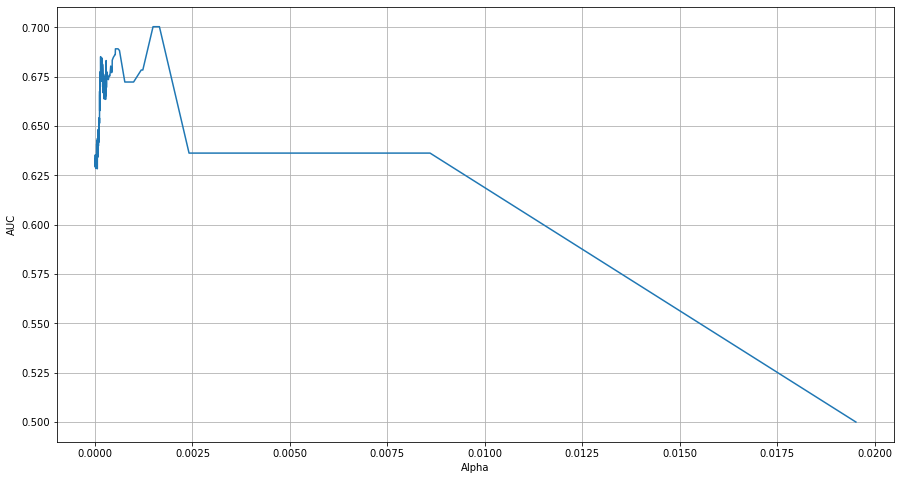

In [8]:

valores_auc = [roc_auc_score(y_test, arbol.predict(X_test)) for arbol in arboles]

plt.figure(figsize=(15 , 8))
plt.grid()
plt.plot(alphas[:-1], valores_auc[:-1])
plt.xlabel("Alpha")
plt.ylabel("AUC");

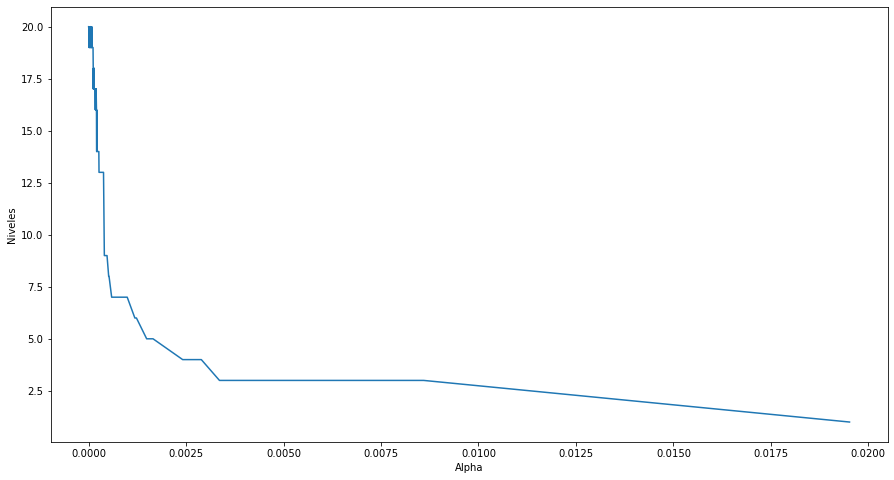

In [9]:
niveles = [arbol.tree_.max_depth for arbol in arboles]
plt.figure(figsize=(15,  8))
plt.plot(alphas[:-1], niveles[:-1])
plt.xlabel("Alpha")
plt.ylabel("Niveles");

In [10]:
ac = DecisionTreeClassifier(ccp_alpha=0.0035)

ac.fit(X_train,y_train)

pred = ac.predict_proba(X_test)[:,1]

roc_auc_score(y_test,pred)

0.7972835774626056

In [11]:
ac.get_params()

{'ccp_alpha': 0.0035,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

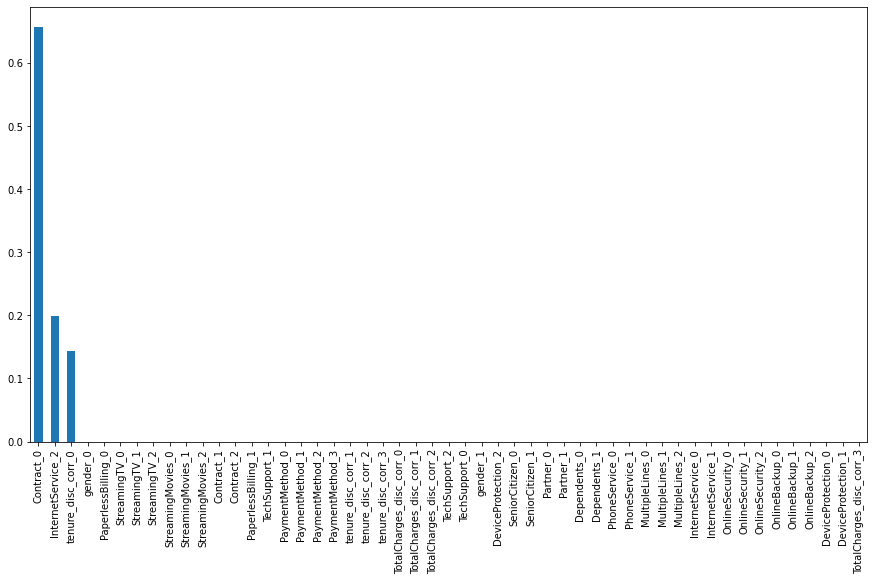

In [12]:
pd.Series(ac.feature_importances_,index = X_test.columns).sort_values(ascending = False).plot(kind = 'bar', figsize=(15,8));

In [13]:
df_performance=pd.read_csv('../data/performance_algoritmos.csv')

In [14]:
df_performance['Algoritmo']='Regresion logistica'

In [15]:
df_performance=df_performance.append({'Auc': ac_auc['Auc'], 'Algoritmo': 'Arb_Dec' }, ignore_index=True)

In [16]:
df_performance.to_csv('../data/performance_algoritmos.csv')